In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
 
#Importing the Decision Tree from scikit-learn library
from sklearn.tree import DecisionTreeClassifier
 
# For splitting of data into train and test set
from sklearn.model_selection import train_test_split

In [188]:
data = pd.read_csv("/content/Heart_Disease.csv")

In [226]:
data.rename(columns={'Heart Disease':'HeartOut'}, inplace=True)
data.head(15)

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HeartOut
0,1,70,1,4,130,322,0,2,109,0,2.4,2,1,3,Yes
1,2,67,0,3,115,279,0,2,160,0,1.6,2,0,7,No
2,3,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Yes
3,4,64,1,4,128,263,0,0,105,1,0.2,2,1,7,No
4,5,74,0,2,120,269,0,2,121,1,0.2,1,1,3,No
5,6,65,1,4,120,177,0,0,140,0,0.4,1,0,7,No
6,7,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Yes
7,8,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Yes
8,9,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Yes
9,10,63,0,4,150,279,0,2,154,0,4.0,2,1,7,Yes


In [233]:
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       270 non-null    int64  
 1   Age                      270 non-null    int64  
 2   Gender                   270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  HeartOut                 2

In [206]:
data.describe(include = 'all')

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,261,264,270
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Private,never smoked,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,159,96,150
mean,135.500000,54.414815,0.685185,3.322222,129.737037,246.711111,0.148148,1.022222,149.907407,0.329630,0.998889,1.585185,0.529630,4.696296,NaN,NaN,NaN
std,78.086491,9.080708,0.465305,0.729023,14.889722,44.084638,0.355906,0.997891,22.685230,0.470952,1.031528,0.614390,0.703848,1.940659,NaN,NaN,NaN
min,1.000000,29.000000,0.000000,2.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN,NaN,NaN
25%,68.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN,NaN,NaN
50%,135.500000,54.500000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,NaN,NaN,NaN
75%,202.750000,61.000000,1.000000,4.000000,140.000000,278.500000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,NaN,NaN,NaN


In [232]:
#no of null values in each column
data.isnull().sum()

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
HeartOut                   0
dtype: int64

In [ ]:
data.nunique()

id                         270
Age                         41
Gender                       2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [191]:
data['Gender'] = data['Gender'].replace("Female",1)
data['Gender'] = data['Gender'].replace("Male",0)

In [139]:
#check for duplicated rows
sum(data.duplicated('id')) 

0

In [213]:
data = data.drop(['work_type'], axis = 1)

In [214]:
data = data.drop(['smoking_status'], axis = 1)

In [207]:
data.dtypes

id                           int64
Age                          int64
Gender                       int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
work_type                   object
smoking_status              object
Heart Disease               object
dtype: object

In [192]:
#replace null values in age with mean
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Age'] = data['Age'].astype('int64')

In [209]:
#replace null values in work/smoking
data['work_type'] = data['work_type'].fillna("Private")
data['smoking_status'] = data['smoking_status'].fillna("never smoked")

In [193]:
#replace null values in Gender with Female as it is the top value
data['Gender'] = data['Gender'].fillna(1)
data['Gender'] = data['Gender'].astype('int64')

<Axes: >

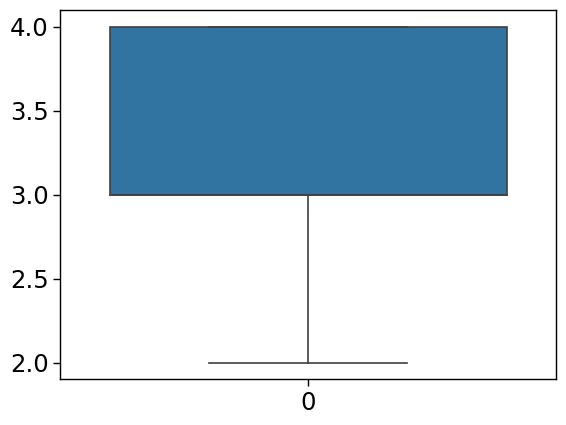

In [202]:
#detecting the outliers
sns.boxplot(data['Chest pain type'])
#replace values with min

<Axes: >

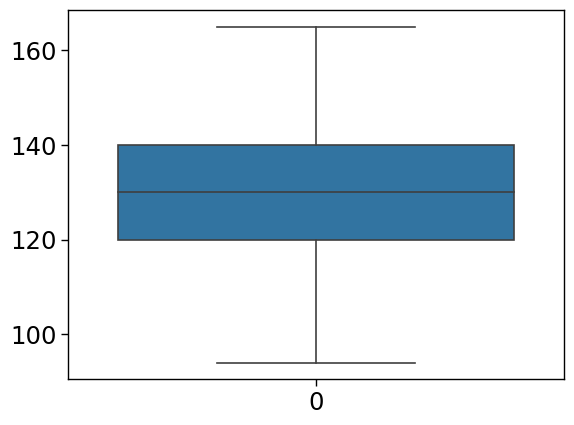

In [201]:
sns.boxplot(data['BP'])
#replace values with max

<Axes: >

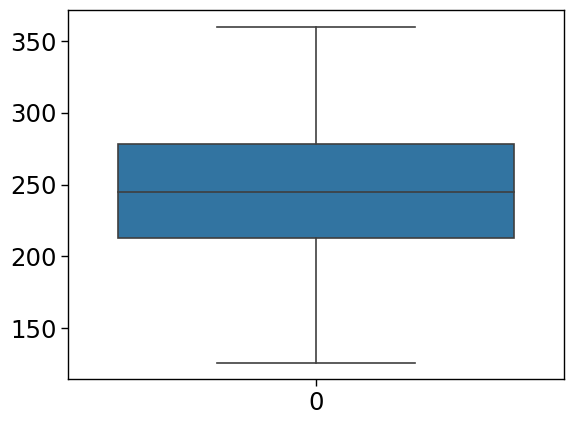

In [160]:
sns.boxplot(data['Cholesterol'])
#replace values with max

<Axes: >

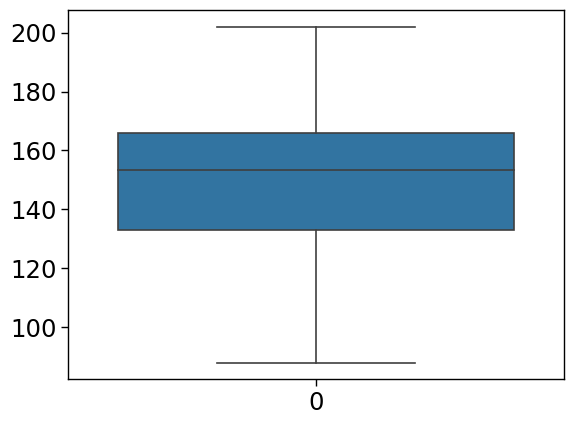

In [166]:
sns.boxplot(data['Max HR'])
#replace values with min

<Axes: >

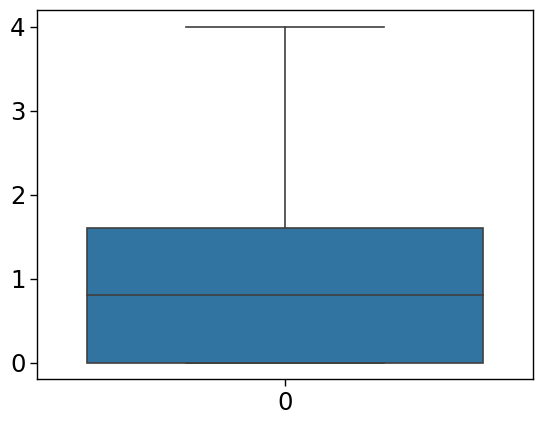

In [167]:
sns.boxplot(data['ST depression'])
#replace values with max

<Axes: >

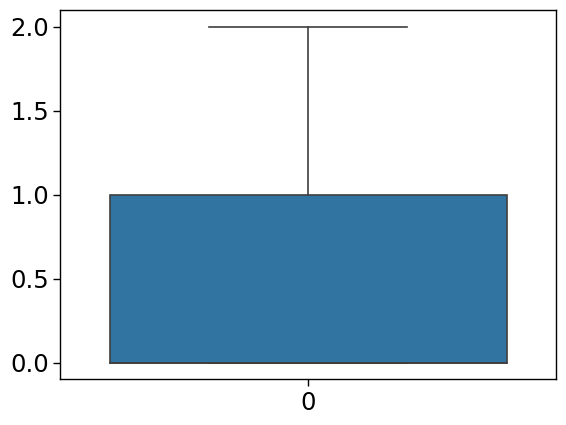

In [169]:
sns.boxplot(data['Number of vessels fluro'])

<Axes: >

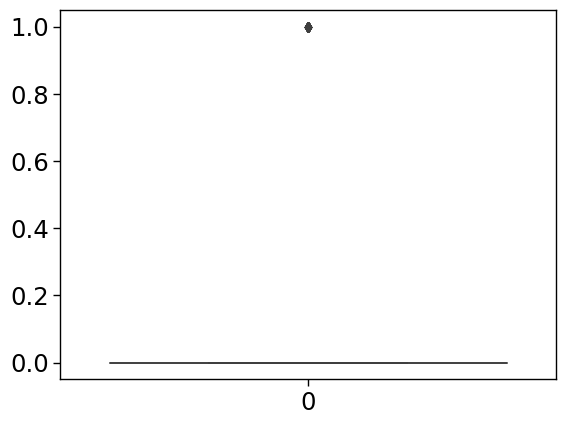

In [152]:
sns.boxplot(data['FBS over 120'])

In [195]:

chest_type = data['Chest pain type']

# Calculate the first quartile (q1)
q1 = chest_type.quantile(0.25)

# Find the indices of the values less than 1.5
outlier_indices = np.where(chest_type < 1.5)[0]

# Replace the values less than 1.5 with q1
data.loc[outlier_indices, 'Chest pain type'] = q1

In [196]:
#getting outliers with the iqr method of the BP
Q1 = np.percentile(data['BP'], 25, method = 'midpoint')
Q3 = np.percentile(data['BP'], 75, method = 'midpoint')
IQR = Q3 - Q1
upper_boundBP = data['BP'] >= (Q3+1.5*IQR)
lower_boundBP = data['BP'] <= (Q1-1.5*IQR)
BP_out = np.where(upper_boundBP)[0]
data.loc[BP_out, 'BP'] = Q3


In [197]:
#outliers of the Cholestrol
Q1c = np.percentile(data['Cholesterol'], 25, method = 'midpoint')
Q3c = np.percentile(data['Cholesterol'], 75, method = 'midpoint')
IQRc = Q3c - Q1c
upper_boundc = data['Cholesterol'] >= (Q3c+1.5*IQRc)
lower_boundc = data['Cholesterol'] <= (Q1c-1.5*IQRc)
Ch_out = np.where(upper_boundc)[0]
data.loc[Ch_out, 'Cholesterol'] = Q3c

In [198]:
#outliers of the Max HR
Max = data['Max HR']
M_out = np.where(Max < 75)[0]
q1m = Max.quantile(0.25)
data.loc[M_out, 'Max HR'] = q1m

In [199]:
#outliers of the ST depression
ST = data['ST depression']
ST_out = np.where(ST > 4)[0]
q3s = ST.quantile(0.75)
data.loc[ST_out, 'ST depression'] = q3s

In [200]:
#outliers of the Vessel Fluro
Fluro = data['Number of vessels fluro']
F_out = np.where(Fluro > 2.5)[0]
q3f = Fluro.quantile(0.75)
data.loc[F_out, 'Number of vessels fluro'] = q3f

<Axes: xlabel='Gender', ylabel='Age'>

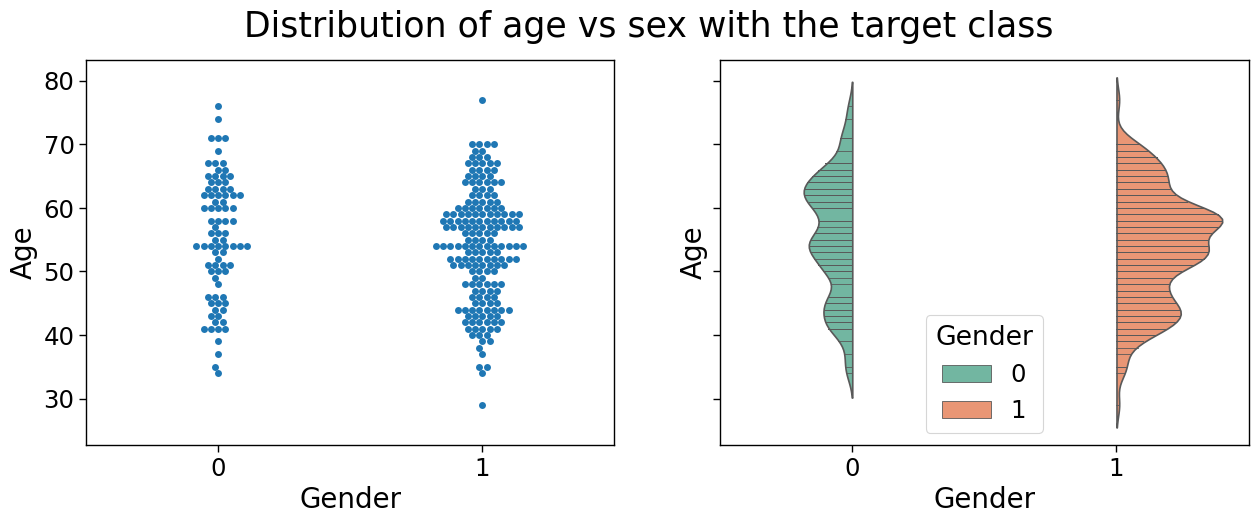

In [179]:
# distribution of sex vs age  with target
import seaborn as sb
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Distribution of age vs sex with the target class',fontsize=25)

sb.swarmplot(ax=axes[0],y = data['Age'], x = data['Gender'])

sb.violinplot(ax=axes[1],x="Gender", y= data['Age'], hue="Gender",
                    data=data, palette="Set2", split=True,
                    scale="count", inner="stick",
                    scale_hue=False, bw=.2)

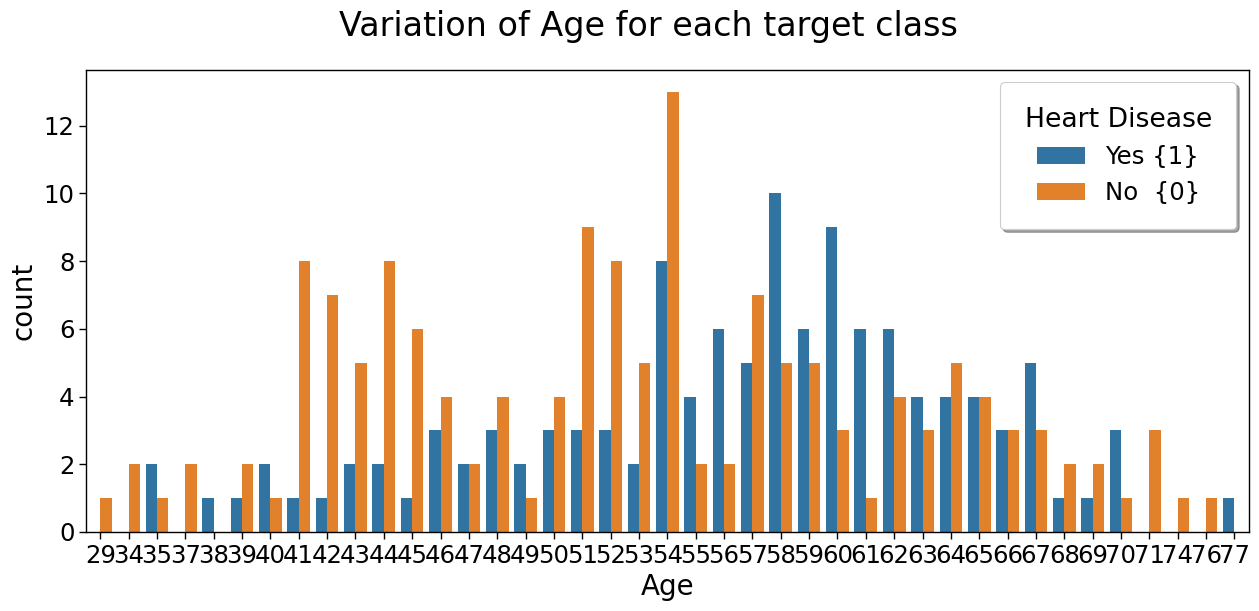

In [231]:
# distribution of age  with the disease
sb.set_context("paper", font_scale = 2, rc = {"font.size": 20,"axes.titlesize": 25,"axes.labelsize": 20}) 
fig, ax = plt.subplots(figsize=(15, 6))
a = sb.countplot(ax = ax, data = data, x = 'Age', hue = 'HeartOut', order = data['Age'].sort_values().unique())
legend_labels, _= a.get_legend_handles_labels()
ax.legend(legend_labels, ['Yes {1}','No  {0}'], bbox_to_anchor=(1,1),title="Heart Disease",fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig.suptitle('Variation of Age for each target class')
plt.show()

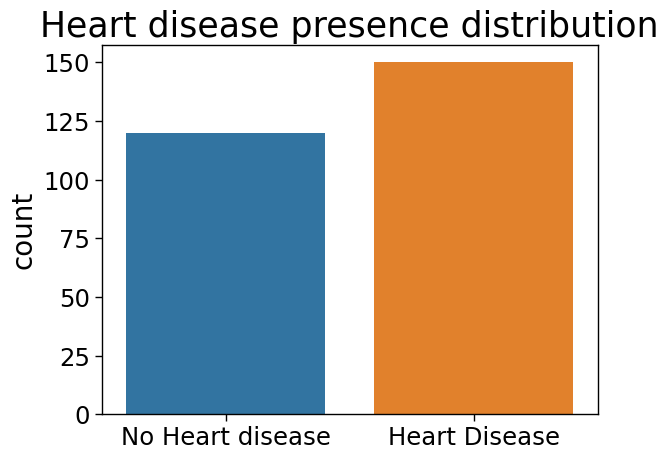

In [229]:
#ppl with heart disease vs with no heart disease
f = sns.countplot(x='HeartOut', data=data)
f.set_title("Heart disease presence distribution")
f.set_xticklabels(['No Heart disease', 'Heart Disease'])
plt.xlabel("");

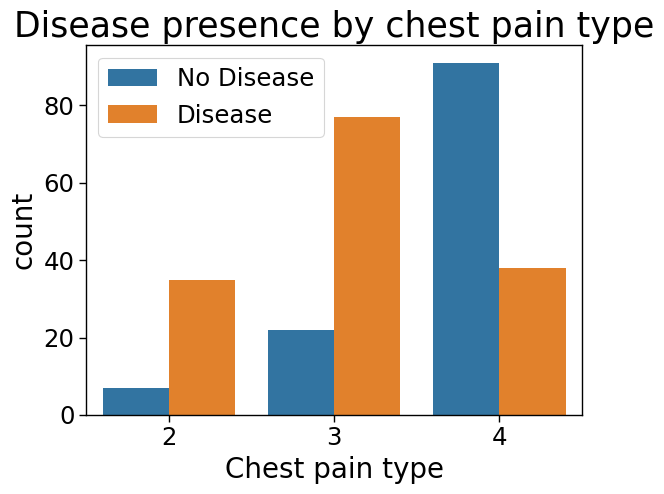

In [228]:
#relation between chest pain type and heart disease
f = sns.countplot(x='Chest pain type', data=data, hue='HeartOut')

f.set_title('Disease presence by chest pain type')
plt.ylabel('count')
plt.xlabel('Chest pain type')
plt.legend(['No Disease', 'Disease']);

In [184]:
#only run to download modified data
from google.colab import files
data.to_csv("Modified_Data.csv", index=False)
files.download("Modified_Data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [212]:
#correlation matrix for feature selection
matrix = data.corr().round(2)
print(matrix)

                           id   Age  Gender  Chest pain type    BP  \
id                       1.00 -0.04    0.03            -0.04  0.04   
Age                     -0.04  1.00   -0.08             0.16  0.27   
Gender                   0.03 -0.08    1.00             0.10 -0.04   
Chest pain type         -0.04  0.16    0.10             1.00  0.05   
BP                       0.04  0.27   -0.04             0.05  1.00   
Cholesterol              0.11  0.19   -0.14             0.07  0.16   
FBS over 120            -0.01  0.12    0.04            -0.07  0.11   
EKG results             -0.04  0.13    0.06             0.15  0.12   
Max HR                   0.10 -0.39   -0.08            -0.35 -0.06   
Exercise angina         -0.06  0.10    0.17             0.40  0.03   
ST depression            0.07  0.20    0.11             0.29  0.17   
Slope of ST              0.02  0.15    0.05             0.23  0.10   
Number of vessels fluro -0.03  0.35    0.07             0.25  0.04   
Thallium            

<ipython-input-212-44ac15cdfbe5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr().round(2)


In [235]:
#splitting the data
y = data.HeartOut
data.drop(['HeartOut'], axis=1, inplace=True)
X = data


In [245]:
#change categorical values
y= y.map({'Yes':1,'No':0})

In [247]:
# Now we split the dataset in train and test part
# here the train set is 75% and test set is 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [248]:
#trainning the model
DT= DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [249]:
#predict the output
pred=DT.predict(X_test)

In [250]:
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred))

0.7647058823529411
0.6923076923076923
